# *Analysis 6: GameEvents*

In addition to the information related to teams and lineups, each match also has details of the __events__ that occurred __during the game__. Let's proceed with the __visualization__ of the dataset and its __structure__.


In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import sys
sys.path.insert(0, '../')

In [2]:
df= pd.read_csv('../Datasets/game_events.csv')
df.head()

,game_event_id,date,game_id,minute,type,club_id,player_id,description,player_in_id,player_assist_id
0,2f41da30c471492e7d4a984951671677,2012-08-05,2211607,77,Cards,610,4425,"1. Yellow card , Mass confrontation",NaN,NaN
1,a72f7186d132775f234d3e2f7bc0ed5b,2012-08-05,2211607,77,Cards,383,33210,"1. Yellow card , Mass confrontation",NaN,NaN
2,b2d721eaed4692a5c59a92323689ef18,2012-08-05,2211607,3,Goals,383,36500,", Header, 1. Tournament Goal Assist: , Corner,...",NaN,56416.0
3,aef768899cedac0c9a650980219075a2,2012-08-05,2211607,53,Goals,383,36500,", Right-footed shot, 2. Tournament Goal Assist...",NaN,146258.0
4,5d6d9533023057b6619ecd145a038bbe,2012-08-05,2211607,74,Substitutions,383,36500,", Not reported",49499.0,NaN


After analyzing the table, we understand what the __columns__ represent:
- **game_event_id**: **Unique identifier** for the **game event**. It distinguishes each row as a unique entry.
- **date**: The **date** on which the **match** took place. It indicates the day the event occurred.
- **game_id**: **Unique identifier** of the **match**. Each match has a **specific ID**.
- **minute**: The **minute** in which the **event** occurred during the **match**.
- **type**: The **type of event** that occurred. It can be **"Goals"** (goals), **"Cards"** (cards), **"Substitutions"** (substitutions), etc.
- **club_id**: **Unique identifier** of the **club**. This ID distinguishes the various clubs.
- **player_id**: **Unique identifier** of the **player** involved in the **event**. Each player has a **specific ID**.
- **description**: **Detailed description** of the **event**. It provides additional information about the event.
- **player_in_id**: **Unique identifier** of the **player** who entered the field (useful for **substitutions**).
- **player_assist_id**: **Unique identifier** of the **player** who made the **assist** (useful for **assisted goals**).


In [3]:
print('Numero di righe e colonne:', df.shape)

Numero di righe e colonne: (666558, 10)


Naturally, this dataset contains elements that are continuously updated and therefore __dynamic__: this is evident from the large number of rows present.


In [4]:
df.isnull().sum()

game_event_id            0
date                     0
game_id                  0
minute                   0
type                     0
club_id                  0
player_id                0
description         336325
player_in_id        245309
player_assist_id    635701
dtype: int64

In [5]:
df.dtypes

game_event_id        object
date                 object
game_id               int64
minute                int64
type                 object
club_id               int64
player_id             int64
description          object
player_in_id        float64
player_assist_id    float64
dtype: object

Let's check the data types present in the dataset to properly handle the presence of __null__ values.
We will proceed by making the __null__ values within the dataset __consistent__.


In [6]:
df['description'] = df['description'].fillna('Unknown')
df['player_in_id'] = df['player_in_id'].fillna(-1)
df['player_assist_id'] = df['player_assist_id'].fillna(-1)
df.isnull().sum()

game_event_id       0
date                0
game_id             0
minute              0
type                0
club_id             0
player_id           0
description         0
player_in_id        0
player_assist_id    0
dtype: int64

Now that the null values have been handled, we can proceed with the __charts__.
The charts used in this part of the analysis are similar: the __correlations__
studied between the data are __similar__, so it is appropriate not to change the type of chart.


The next chart shows how __frequently__ each type of __event__ (Goals, Cards, Substitutions, Shootout)
occurs within the dataset. This visualization is useful for understanding the __distribution__ of various events
in a __match__ and can provide insights into the __frequency__ of certain events __compared to others__.


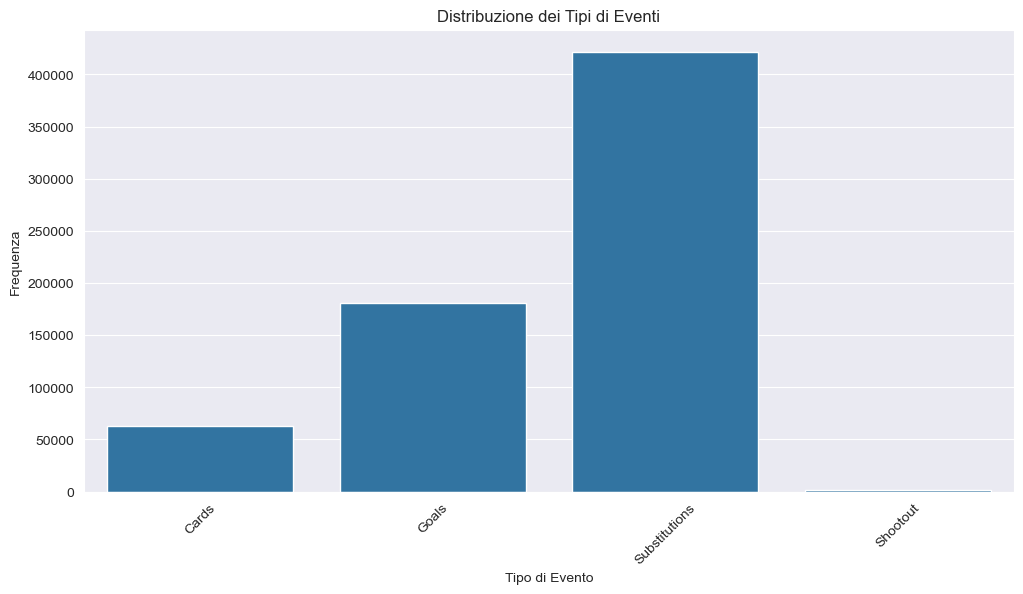

In [7]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='type')
plt.title('Distribuzione dei Tipi di Eventi')
plt.xlabel('Tipo di Evento')
plt.ylabel('Frequenza')
plt.xticks(rotation=45) 
plt.show()

The next chart shows the __evolution__ of the number of __events__ per __year__. This visualization
is useful for understanding how the frequency of events has changed over time. It can provide insights
into __temporal trends__ in the dataset, such as an increase or decrease in the number of events recorded each year.


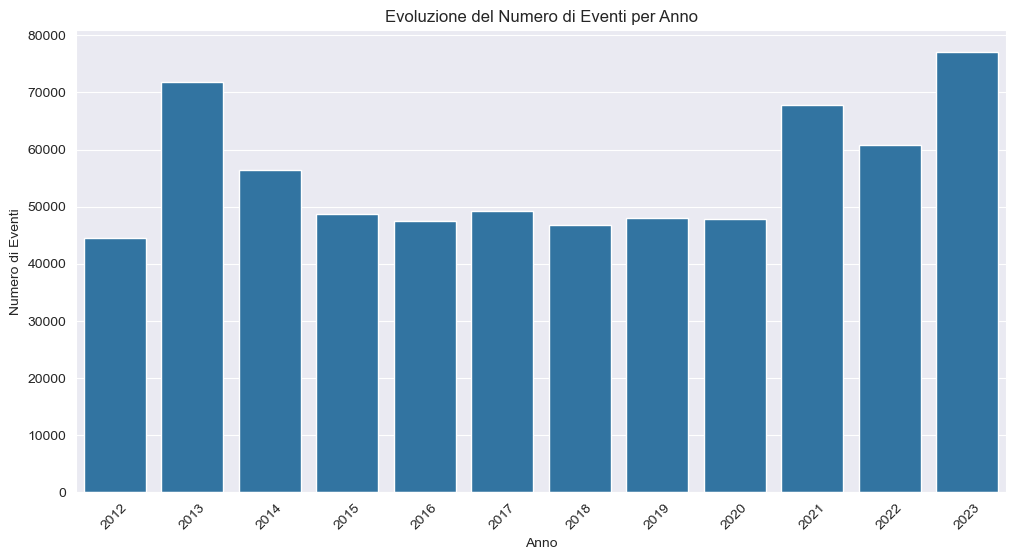

In [8]:

df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year  

plt.figure(figsize=(12, 6)) 
sns.countplot(data=df, x='year')
plt.title('Evoluzione del Numero di Eventi per Anno')
plt.xlabel('Anno')
plt.ylabel('Numero di Eventi')
plt.xticks(rotation=45)
plt.show()


The histogram below represents the __distribution__ of the __minutes__ during which the most events occur in matches.
This visualization is useful for understanding at which moments in the match events occur more frequently.
The added kernel density estimate __(KDE)__ line provides a __smoother representation of the distribution__,
helping to identify any __peaks__ or __trends__ in the data.


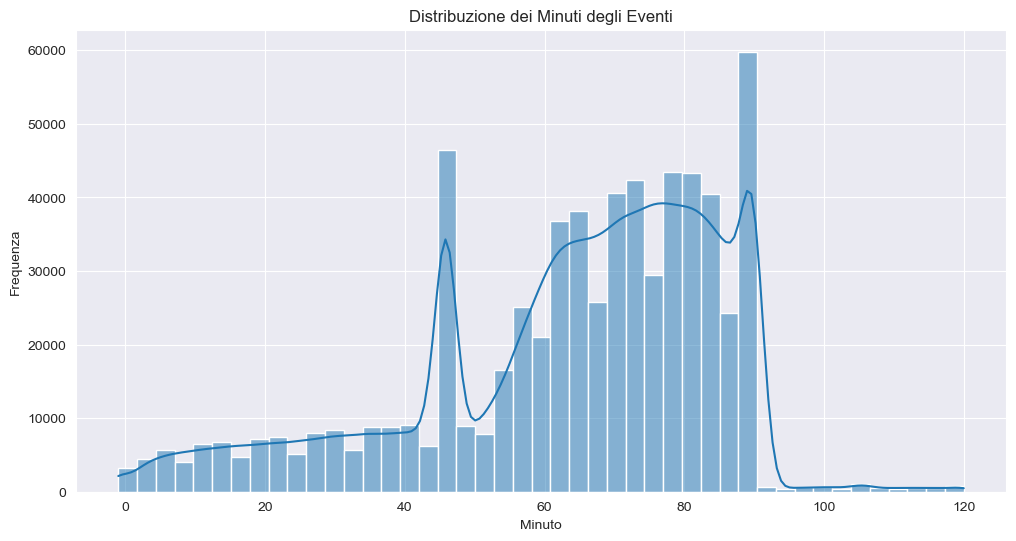

In [9]:
plt.figure(figsize=(12, 6))
sns.histplot(df['minute'].dropna(), bins=45, kde=True) 
plt.title('Distribuzione dei Minuti degli Eventi')
plt.xlabel('Minuto')
plt.ylabel('Frequenza')
plt.show()

A more specific analysis can be performed.
The __histogram__ shows the distribution of goals __scored__ at different minutes of the matches.
This visualization is useful for understanding at which moments in the match goals are scored more frequently.
The added kernel density estimate (KDE) line provides a smoother representation of the distribution,
helping to identify any peaks or trends in the minutes when goals are scored.


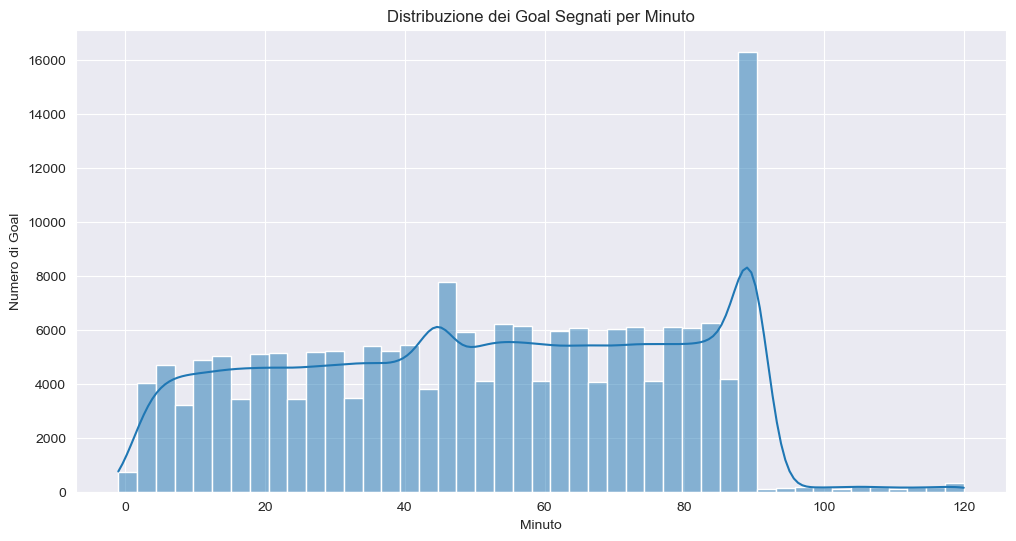

In [10]:
goals_df = df[df['type'] == 'Goals']

plt.figure(figsize=(12, 6))
sns.histplot(goals_df['minute'].dropna(), bins=45, kde=True) 
plt.title('Distribuzione dei Goal Segnati per Minuto')
plt.xlabel('Minuto')
plt.ylabel('Numero di Goal')
plt.show()

The histogram shows the __distribution__ of __substitutions__ made at different minutes of the matches.


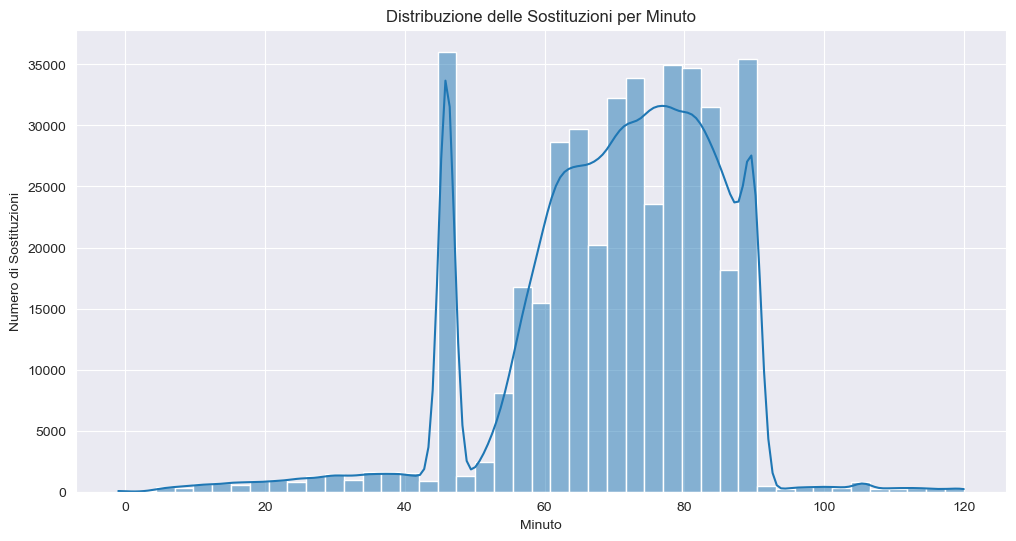

In [11]:
subs_df = df[df['type'] == 'Substitutions']

plt.figure(figsize=(12, 6))
sns.histplot(subs_df['minute'].dropna(), bins=45, kde=True)
plt.title('Distribuzione delle Sostituzioni per Minuto')
plt.xlabel('Minuto')
plt.ylabel('Numero di Sostituzioni')
plt.show()

We use a __bar chart__ for the next analysis.
The resulting chart shows the __distribution__ of __goals__ scored by the __top football clubs__.
This visualization is useful for understanding which clubs have scored the most goals, allowing
us to identify the clubs with the __best offensive performances__.
A **Join** is also performed to display the correct names of the teams on the x-axis, rather than their **IDs**.


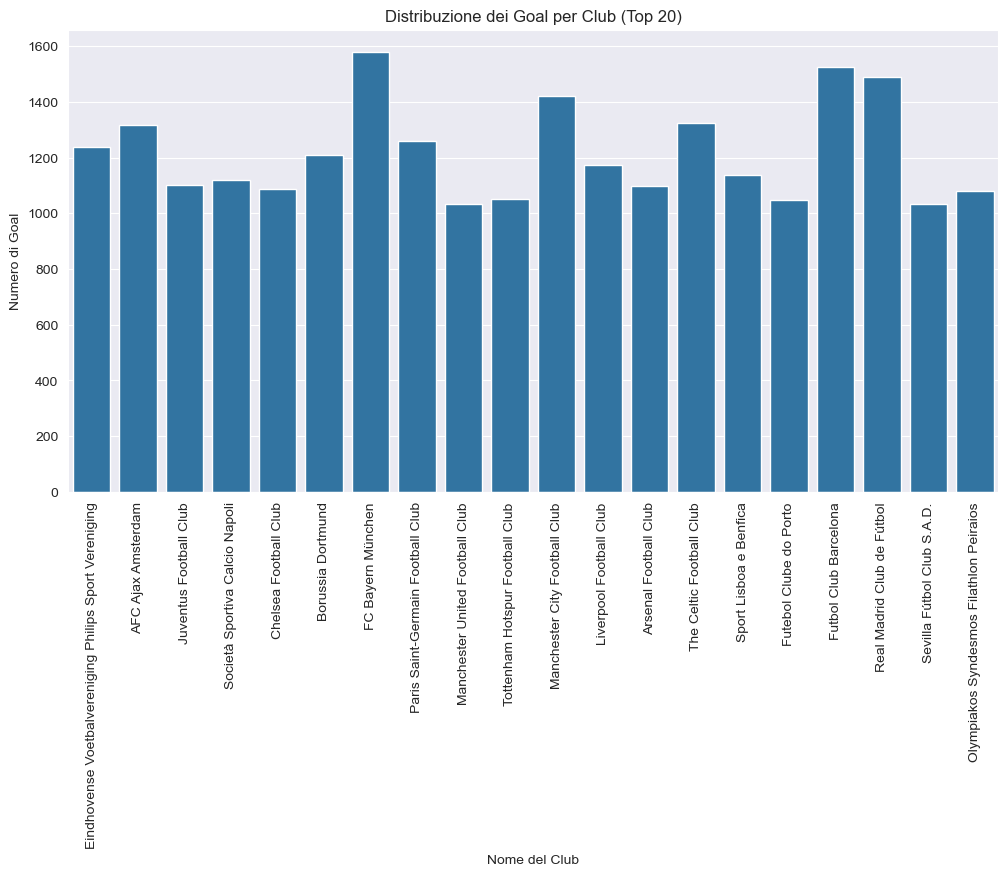

In [12]:
from Utils.GameEventsUtils import filter_top_clubs, load_clubs_data, merge_club_names, filter_top_club_data, create_bar_chart
goals_df, top_clubs_goals = filter_top_clubs(df, 'Goals')

clubs_df = load_clubs_data('../Datasets/clubs.csv')
goals_df = merge_club_names(goals_df, clubs_df)
top_goals_df = filter_top_club_data(goals_df, top_clubs_goals)
create_bar_chart(top_goals_df, 'name', 'Distribuzione dei Goal per Club (Top 20)', 'Nome del Club', 'Numero di Goal')



Let's analyze the __trend__ of events over time, specifically the __goals__, to identify any significant trends or variations
in the number of goals scored across the years.


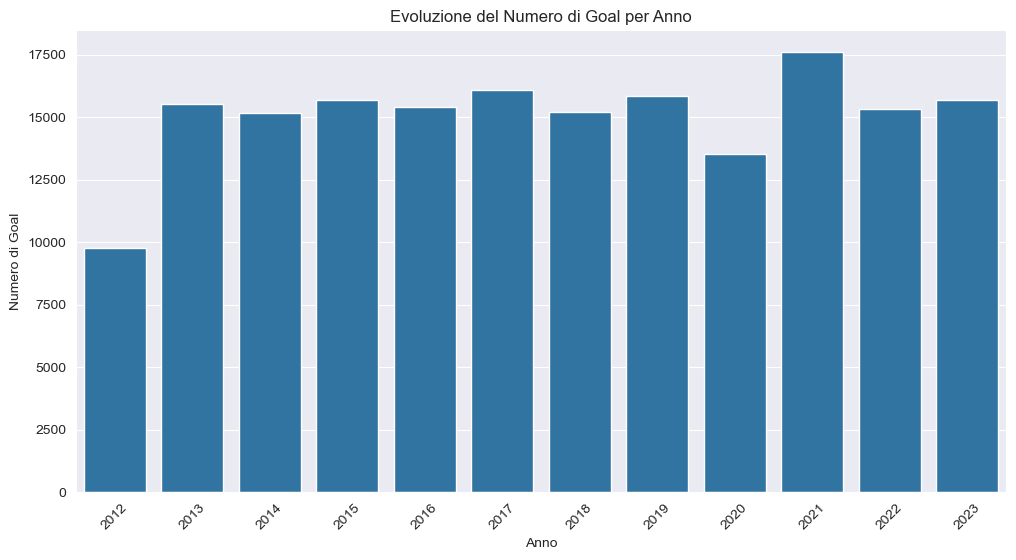

In [13]:
from Utils.GameEventsUtils import create_goals_evolution_chart
create_goals_evolution_chart(goals_df)

Finally, let's analyze the __distribution__ of __red cards__ (expulsions) by club.
The __bar chart__ shows the distribution of red cards for the top clubs. This visualization is useful for understanding
which clubs have had the __highest__ number of __expulsions__, allowing us to identify clubs with a higher incidence
of behavior leading to red cards.
We utilize the __description__ column of the event and check for the presence of the string __'Red card'__.

A *Join* is also performed here to display the correct names of the clubs.


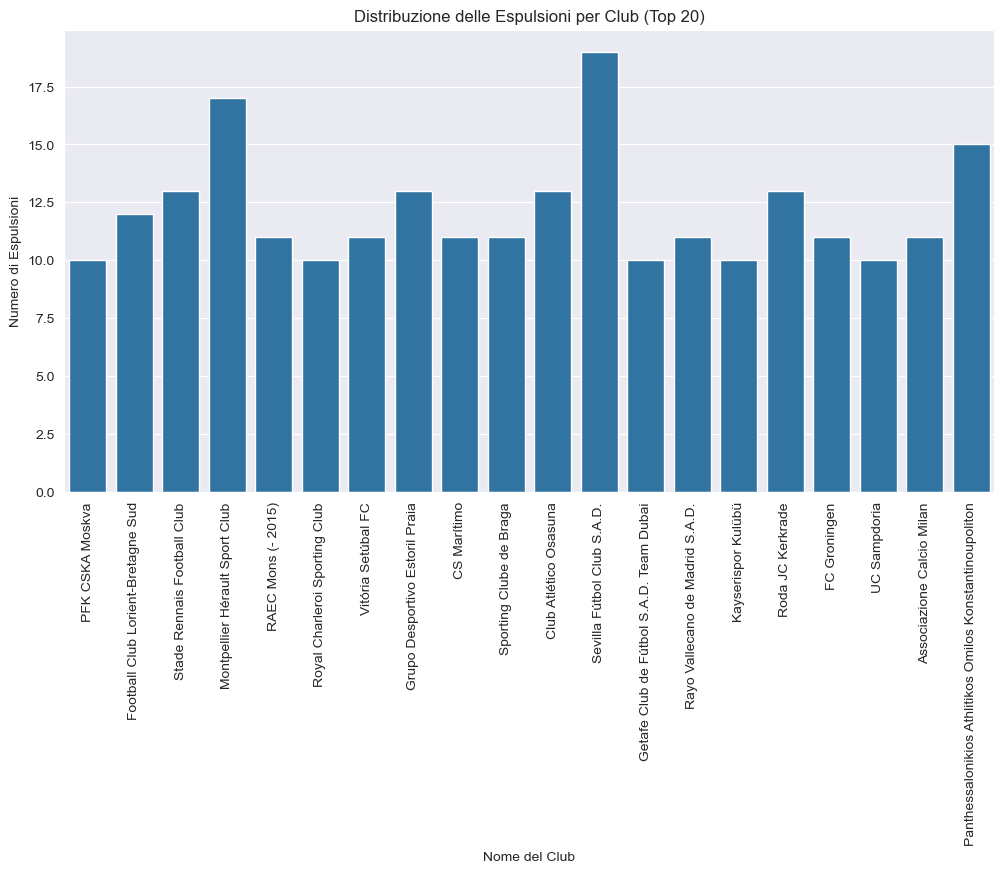

In [14]:
red_cards_df = df[df['description'].str.contains('Red card', na=False)]
top_clubs_red_cards = red_cards_df['club_id'].value_counts().nlargest(20).index
red_cards_df = merge_club_names(red_cards_df, clubs_df)
top_red_cards_df = filter_top_club_data(red_cards_df, top_clubs_red_cards)
create_bar_chart(top_red_cards_df, 'name', 'Distribuzione delle Espulsioni per Club (Top 20)', 'Nome del Club', 'Numero di Espulsioni')